In [184]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from src.helper import accuracy_scores
from src.confusion_df import render_mpl_table
from src.confusion_df import confusion_df
from src.roc import plot_roc_curve

from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#df=pd.read_csv('GabHateCorpus_full_predictions.csv')

In [8]:
#df.head()

In [5]:
df2=pd.read_csv('data/GabHateCorpus_annotations.tsv', sep='\t')

In [76]:
df2.tail()

,ID,Annotator,Text,Hate,HD,CV,VO,REL,RAE,SXO,GEN,IDL,NAT,POL,MPH,EX,IM
86524,9188,6,"He thinks only peons own guns, you're supposed...",1,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
86525,9188,3,"He thinks only peons own guns, you're supposed...",0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86526,9222,11,America must stop funding the United Nations.,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86527,9222,3,America must stop funding the United Nations.,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86528,9222,6,America must stop funding the United Nations.,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
document_tfidf_matrix = vectorizer.fit_transform(df2['Text'])

In [8]:
len(vectorizer.vocabulary_)

42969

In [9]:
#print(sorted(vectorizer.vocabulary_))
print(document_tfidf_matrix.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
type(document_tfidf_matrix)

scipy.sparse.csr.csr_matrix

In [11]:
#document_tfidf_matrix = document_tfidf_matrix.toarray()

In [12]:
type(document_tfidf_matrix)

scipy.sparse.csr.csr_matrix

In [13]:
document_tfidf_matrix.shape

(86529, 42969)

In [14]:
words = vectorizer.get_feature_names()
words[-10:]

['𝕷𝖎𝖘𝖙𝖊𝖓𝖎𝖓𝖌',
 '𝕹𝖎𝖇𝖊𝖑𝖚𝖓𝖌𝖊𝖓',
 '𝕺𝖋',
 '𝕽𝖎𝖓𝖌',
 '𝕿𝖍𝖊',
 '𝕿𝖎𝖒𝖊',
 '𝕿𝖔',
 '𝖉𝖊𝖘',
 '𝙽𝚊𝚛𝚛𝚊𝚝𝚒𝚟𝚎',
 '𝟏𝐬𝐭']

In [15]:
#plt.figure(figsize=(20,4))
#_ = plt.imshow(document_tfidf_matrix[:,200:600])

## Logistic Regression

In [16]:
X = document_tfidf_matrix
y = df2['Hate']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [141]:
model_LR = LogisticRegression().fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
model_LR.predict_proba(X_test)

array([[0.73687569, 0.26312431],
       [0.96249921, 0.03750079],
       [0.96595441, 0.03404559],
       ...,
       [0.91512314, 0.08487686],
       [0.7033827 , 0.2966173 ],
       [0.9265125 , 0.0734875 ]])

In [143]:
coef = model_LR.coef_.reshape(-1)

In [144]:
y_predict_LR = [int(p[1] > 0.5) for p in model_LR.predict_proba(X_test)]

In [145]:
coef[0]

-0.327769374925574

In [146]:
words = np.array(words)
idx = np.argsort(coef)[-10:]
words[idx]

array(['libtards', 'kikes', 'muslims', 'white', 'jews', 'faggot',
       'muslim', 'jew', 'niggers', 'nigger'], dtype='<U217')

In [147]:
accuracy_score(y_test, y_predict_LR)

0.8762856812666128

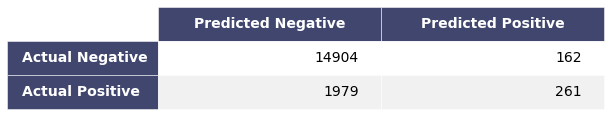

In [148]:
data=confusion_df(y_test, y_predict_LR)
fig, ax = render_mpl_table(data)
fig.savefig('img/lr_cm1.png', bbox_inches='tight')

In [149]:
accuracy, recall, precision, mse = accuracy_scores(y_test, y_predict_LR)
print(f"accuracy : {accuracy}")
print(f"recall : {recall}")
print(f"precision : {precision}")
print(f"mse : {mse}")

accuracy : 0.876
recall : 0.117
precision : 0.617
mse : 0.124


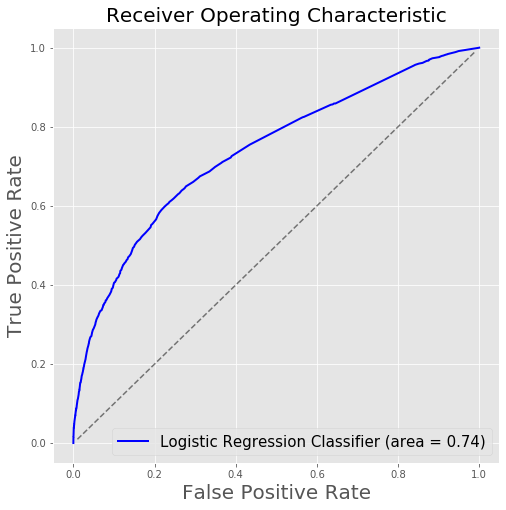

In [152]:
# Plot receiver operating characteristics (ROC) 
proba_true_lr = model.predict_proba(X_test)[:,1]
fig, ax = plt.subplots(figsize=(8,8))
plot_roc_curve(proba_true_lr, y_test, ax, title='Logistic Regression Classifier',color='b')
plt.savefig('img/roc_lr.png', dpi=250)

## Random Forest

In [42]:
# Train and fit model (max_depth=10)                                                  
rf = RandomForestClassifier(n_estimators=40,
                           max_features=5,
                           max_depth=10,
                            random_state=0)
rf.fit(X_train, y_train)
      
# Test Prediction
y_pred_rf = rf.predict(X_test)

In [43]:
# Get some statistics
#a, r, p, mse = accuracy_scores(yt, y_pred)
#df = confusion_df(yt, y_pred_rf)
#render_mpl_table(df)                               

accuracy, recall, precision, mse = accuracy_scores(y_test, y_pred_rf)
print(f"accuracy : {accuracy}")
print(f"recall : {recall}")
print(f"precision : {precision}")
print(f"mse : {mse}")

accuracy : 0.871
recall : 0.0
precision : nan
mse : 0.129


/Users/benw/Documents/ds/Galvanize/capstone projects/project 2/hate-speech/src/helper.py:57: RuntimeWarning: invalid value encountered in long_scalars
  precision = round(tp/(tp+fp), 3)


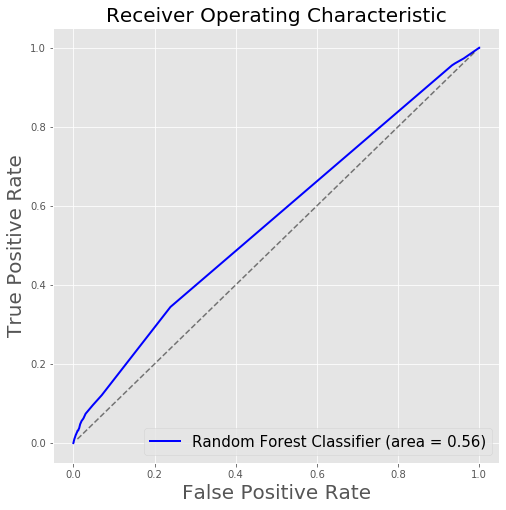

In [139]:
# Plot receiver operating characteristics (ROC) 
proba_true_rf = rf.predict_proba(X_test)[:,1]
fig, ax = plt.subplots(figsize=(8,8))
plot_roc_curve(proba_true_rf, y_test, ax, 'Random Forest Classifier', color='b')
plt.savefig('img/roc_rf.png', dpi=300)

## Gradient Boosted Classifier

In [153]:
# Make model and get accuracy scores/confusion matrix
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train, y_train)

y_pred_gb = model_GB.predict(X_test)

In [154]:
a, r, p, mse = accuracy_scores(y_test, y_pred_gb)
a, r, p

(0.876, 0.066, 0.728)

(<Figure size 576x135 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a16e7af90>)

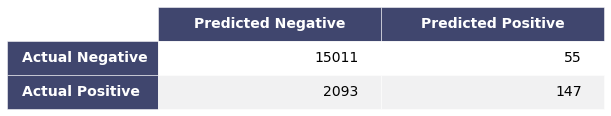

In [155]:
df = confusion_df(y_test, y_pred_gb)
render_mpl_table(df)

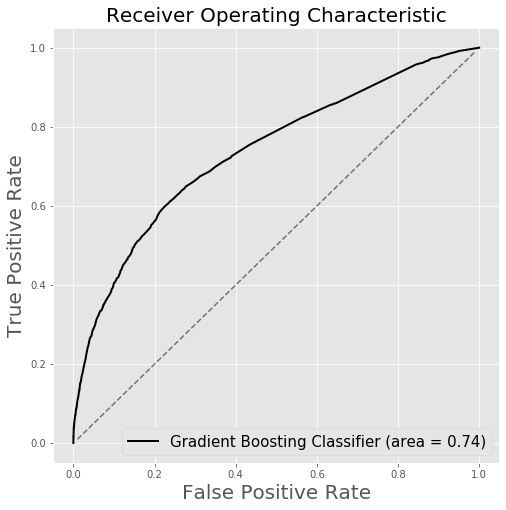

In [161]:
# Plot the roc curve
fig, ax = plt.subplots(figsize=(8,8))
proba_true_gb = model_GB.predict_proba(X_test)[:,1]
plot_roc_curve(proba_true_gb, y_test, ax, "Gradient Boosting Classifier" ,color='k');

In [ ]:
# Save labels for later
#np.savetxt('../data/gbc_yproba.txt', proba_true)
#np.savetxt('../data/gbc_ytrue.txt', y_test)

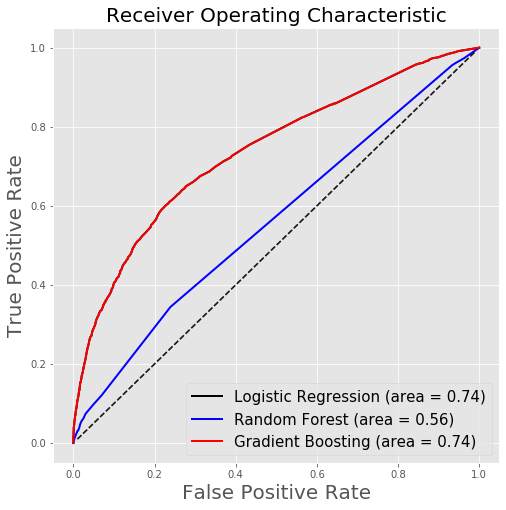

In [162]:
# plot ROC

fig,ax= plt.subplots(figsize=(8,8))

plot_roc_curve(proba_true_lr, y_test, ax, title="Logistic Regression", color='k')
plot_roc_curve(proba_true_rf, y_test, ax, title="Random Forest", color='b')
plot_roc_curve(proba_true_gb, y_test, ax, title="Gradient Boosting",color='r')

fig.savefig('img/roc_overlay.png')

## NMF

In [173]:
df_hate=df2[df2['Hate']==1]

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
document_tfidf_matrix = vectorizer.fit_transform(df_hate['Text'])

In [181]:
V = document_tfidf_matrix

nmf = NMF(n_components=10)
nmf.fit(V)
W = nmf.transform(V)
H = nmf.components_

In [182]:
vocab = np.array(sorted(vectorizer.vocabulary_))

In [183]:
for idx, topic in enumerate(H):
    print(vocab[np.argsort(-topic)[:15]])

['to' 'be' 'need' 'want' 'going' 'have' 'this' 'people' 'these' 'go'
 'back' 'her' 'should' 'do' 'me']
['you' 'your' 're' 'if' 'have' 'can' 'fucking' 'fuck' 'what' 'know' 'do'
 'like' 'don' 'or' 'jew']
['they' 'their' 'have' 'them' 'don' 'do' 're' 'that' 'can' 'so' 'if'
 'want' 'were' 'think' 'like']
['the' 'of' 'in' 'left' 'for' 'world' 'by' 'out' 'from' 'on' 'one' 'right'
 'that' 'at' 'same']
['https' 'com' 'www' 'watch' 'youtube' '2018' 'news' 'http' 'youtu'
 'trump' '08' 'breitbart' 'be' 'this' 'html']
['is' 'this' 'that' 'what' 'no' 'she' 'there' 'islam' 'not' 'why' 'one'
 'jew' 'an' 'about' 'white']
['and' 'we' 'all' 'them' 'for' 'in' 'their' 'our' 'with' 'on' 'get' 'have'
 'will' 'out' 'as']
['are' 'jews' 'all' 'not' 'people' 'white' 'who' 'as' 'whites' 'but' 'men'
 'liberals' 'there' 'those' 'these']
['it' 'not' 'just' 'but' 'like' 'was' 'will' 'that' 'about' 'if' 'white'
 'has' 'me' 'or' 'for']
['he' 'was' 'his' 'him' 'for' 'in' 'that' 'trump' 'nigger' 'had' 'an'
 'obama' 'lik

## Clustering

In [187]:
cluster = KMeans(n_clusters=10)
cluster.fit(document_tfidf_matrix)
centroids = cluster.cluster_centers_

In [188]:
for idx, topic in enumerate(centroids):
    print(vocab[np.argsort(-topic)[:10]])

['white' 'the' 'to' 'and' 'is' 'people' 'are' 'of' 'it' 'be']
['is' 'the' 'this' 'that' 'and' 'it' 'to' 'of' 'what' 'not']
['the' 'to' 'for' 'of' 'and' 'in' 'are' 'that' 'it' 'be']
['https' 'com' 'www' '2018' 'the' 'youtube' 'watch' 'news' 'http' 'to']
['he' 'his' 'the' 'to' 'was' 'and' 'is' 'him' 'in' 'of']
['the' 'of' 'and' 'are' 'in' 'to' 'that' 'jews' 'all' 'is']
['she' 'her' 'to' 'is' 'and' 'the' 'woman' 'of' 'that' 'in']
['you' 'your' 'the' 'to' 'and' 'are' 're' 'if' 'have' 'that']
['they' 'the' 'are' 'to' 'and' 'their' 'them' 'have' 'of' 'it']
['to' 'we' 'the' 'and' 'it' 'that' 'of' 'be' 'have' 'in']
